### Problem Statement

The client is facing a problem in identifying the right people for promotion (only for manager position and below) and prepare them in time.The company needs help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle. 

They have provided multiple attributes around Employee's past and current performance along with demographics. Now, The task is to predict whether a potential promotee at checkpoint in the test set will be promoted or not after the evaluation process.

#### Dataset Description

1. employee_id:	Unique ID for employee
2. department:	Department of employee
3. region:	Region of employment (unordered)
4. education:	Education Level
5. Gender:	Gender of Employee
6. recruitment_channel:	Channel of recruitment for employee
7. no_of_trainings:	no of other trainings completed in previous year on soft skills, technical skills etc.
8. age:	Age of Employee
9. previous_year_rating: Employee Rating for the previous year
10. length_of_service:	Length of service in years
11. KPIs_met>80%: if Percent of KPIs(Key performance Indicators) >80% then 1 else 0
12. awards_won?: if awards won during previous year then 1 else 0
13. avg_training_score:	Average score in current training evaluations
14. is_promoted: (Target) Recommended for promotion

### Import Libraries

In [58]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Read dataset

In [59]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [60]:
# lets combine the data for data prep

test['is_promoted']=np.nan
train['data']='train'
test['data']='test'

df= pd.concat([train,test], sort = False , ignore_index= True)

In [61]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,data
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0,train
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0,train
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0,train
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0,train
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0,train


In [62]:
df.shape

(78298, 15)

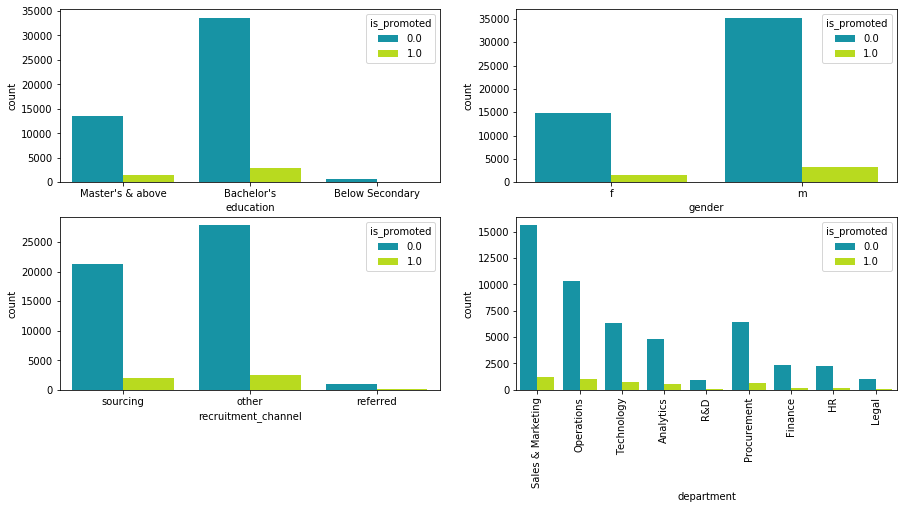

In [116]:
fig, ax= plt.subplots(2,2,figsize=(15,7))
ax=ax.flatten()
sns.countplot(df['education'],hue=df['is_promoted'],palette="nipy_spectral",ax=ax[0])
sns.countplot(df['gender'],hue=df['is_promoted'],palette="nipy_spectral",ax=ax[1])
sns.countplot(df['recruitment_channel'],hue=df['is_promoted'],palette="nipy_spectral",ax=ax[2])
sns.countplot(df['department'],hue=df['is_promoted'],palette="nipy_spectral",ax=ax[3])

plt.show()

The above graph clearly shows that people with bachelor's degree get promotion more than any other educational background. Male are also prefered when a promotion is considered.
People working in the sales and marketing have higer chances of getting promoted. 

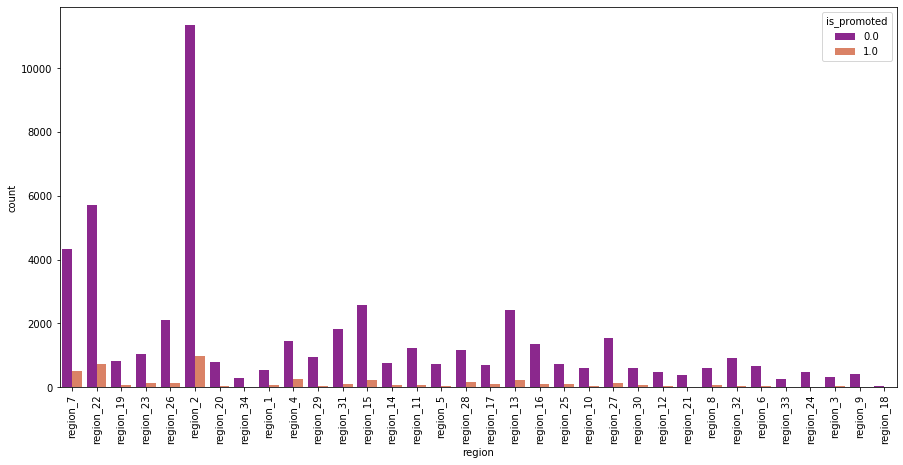

In [104]:
plt.figure(figsize=(15,7))
sns.countplot(df['region'],hue=df['is_promoted'],palette="plasma")
plt.xticks(rotation=90)
plt.show()

In [6]:
for i in df.columns:
    print(i)
    print()
    print(df[i].value_counts(1)*100)
    print()
    print()

employee_id

2047     0.001277
76464    0.001277
25241    0.001277
31386    0.001277
29339    0.001277
           ...   
13676    0.001277
15725    0.001277
9582     0.001277
11631    0.001277
2049     0.001277
Name: employee_id, Length: 78298, dtype: float64


department

Sales & Marketing    30.850086
Operations           20.577793
Procurement          12.973511
Technology           12.962017
Analytics             9.797185
Finance               4.632302
HR                    4.473933
Legal                 1.895323
R&D                   1.837850
Name: department, dtype: float64


region

region_2     22.531865
region_22    11.707834
region_7      8.716698
region_15     5.029503
region_13     4.872411
region_26     4.177629
region_31     3.549261
region_4      3.164832
region_27     3.025620
region_16     2.624588
region_28     2.443230
region_11     2.408746
region_23     2.159698
region_29     1.798258
region_32     1.759943
region_19     1.639889
region_14     1.503231
region_20    

In [117]:
# Since employee_id is unique we can drop that
df=df.drop('employee_id',axis=1)

In [118]:
# Since only 10% data is there in Finance, HR, Legal and R&D combined and they also follow a similar trend in getting promoted  we club them as others
df['department']=df['department'].replace({'Finance':'Others','HR':'Others','Legal':'Others','R&D':'Others'})

In [124]:
df.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted',
       'data'],
      dtype='object')

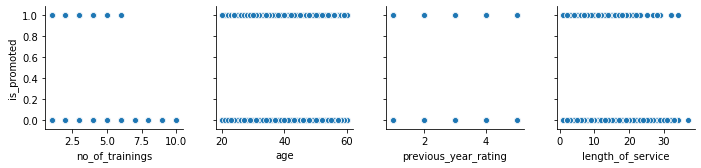

In [126]:
sns.pairplot(y_vars=['is_promoted'],x_vars=['no_of_trainings','age','previous_year_rating','length_of_service'],data=df)
plt.show()

In [129]:
# After 6 number of trainings getting a promotion is not getting affected so we can change number of training after 6 to 6.
df['no_of_trainings']=df['no_of_trainings'].replace({7:6,8:6,9:6,10:6})

In [130]:
# length_of_service 20 and above can be put into the same category
df['length_of_service']=df['length_of_service'].replace({21:20,22:20,23:20,24:20,25:20,26:20,27:20,28:20,29:20,30:20,31:20,32:20,33:20,34:20,37:20})

#### Missing values

In [131]:
df.isna().sum()*100/df.shape[0]

department               0.000000
region                   0.000000
education                4.397303
gender                   0.000000
recruitment_channel      0.000000
no_of_trainings          0.000000
age                      0.000000
previous_year_rating     7.581292
length_of_service        0.000000
KPIs_met >80%            0.000000
awards_won?              0.000000
avg_training_score       0.000000
is_promoted             30.000766
data                     0.000000
dtype: float64

In [132]:
df.education.value_counts()

Bachelor's          52247
Master's & above    21429
Below Secondary      1179
Name: education, dtype: int64

In [133]:
# Imputing missing values with random values in the same probability distribution as given feature already had

vc = df.education.value_counts(normalize = True)
miss = df.education.isna()
df.loc[miss, 'education'] = np.random.choice(vc.index, size = miss.sum(), p = vc.values)

In [134]:
df.education.value_counts()

Bachelor's          54649
Master's & above    22421
Below Secondary      1228
Name: education, dtype: int64

In [135]:
# Changing education to numerical such that higher degree have higher value
df['education']=df['education'].replace({'Below Secondary':1,"Bachelor's":2,"Master's & above":3})

In [136]:
df.previous_year_rating.value_counts()

3.0    26539
5.0    16838
4.0    14126
1.0     8903
2.0     5956
Name: previous_year_rating, dtype: int64

In [137]:
#imputed missing values with random values in the same probability distribution as given feature already had
vc = df.previous_year_rating.value_counts(normalize = True)
miss = df.previous_year_rating.isna()
df.loc[miss, 'previous_year_rating'] = np.random.choice(vc.index, size = miss.sum(), p = vc.values)

In [138]:
df.previous_year_rating.value_counts()

3.0    28707
5.0    18226
4.0    15249
1.0     9660
2.0     6456
Name: previous_year_rating, dtype: int64

In [139]:
df.isna().sum()

department                  0
region                      0
education                   0
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating        0
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
data                        0
dtype: int64

In [140]:
df1=df.drop('region',axis=1)

In [141]:
#Encoding String Values to Numeric values

df1 = pd.get_dummies(df1,columns=['department','gender','recruitment_channel'],drop_first = True)

In [142]:
df1.head()

,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,data,department_Operations,department_Others,department_Procurement,department_Sales & Marketing,department_Technology,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,3,1,35,5.0,8,1,0,49,0.0,train,0,0,0,1,0,0,0,1
1,2,1,30,5.0,4,0,0,60,0.0,train,1,0,0,0,0,1,0,0
2,2,1,34,3.0,7,0,0,50,0.0,train,0,0,0,1,0,1,0,1
3,2,2,39,1.0,10,0,0,50,0.0,train,0,0,0,1,0,1,0,0
4,2,1,45,3.0,2,0,0,73,0.0,train,0,0,0,0,1,1,0,0


In [143]:
#splitting the data back into train and test as it was already provided

train = df1[df1['data']=='train']
train.drop(['data'],axis=1,inplace=True)

test = df1[df1['data']=='test']
test.drop(['data'],axis=1,inplace=True)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [144]:
print(train.shape)
print(test.shape)

(54808, 17)
(23490, 17)


In [145]:
X_train = train.drop("is_promoted",axis = 1)
y_train = train["is_promoted"]

In [146]:
y_train.value_counts(1)*100
# There is huge data imbalance so we use smote

0.0    91.482995
1.0     8.517005
Name: is_promoted, dtype: float64

In [147]:
X_test = test.drop("is_promoted",axis = 1)
y_test = test["is_promoted"]

#### Dealing with data imbalance

SMOTE (Synthetic Minority Over-sampling Technique) Algorithm oversamples the minority instances and makes it equal to majority class. Both categories have equal amount of records. 

In [148]:
print("Before OverSampling")
print()
print(y_train.value_counts())


# Applying SMOTE
from imblearn.over_sampling import SMOTE
x_sample, y_sample = SMOTE().fit_sample(X_train, y_train.values.ravel())

X_train_sm = pd.DataFrame(x_sample)
y_train_sm = pd.DataFrame(y_sample)

print()
print("After OverSampling")
print()
print(y_train_sm[0].value_counts())



Before OverSampling

0.0    50140
1.0     4668
Name: is_promoted, dtype: int64

After OverSampling

1.0    50140
0.0    50140
Name: 0, dtype: int64


### Model building

In [160]:
# standard scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sm_std =pd.DataFrame(sc.fit_transform(X_train_sm),columns=X_train.columns)
X_test_std  = pd.DataFrame(sc.transform(X_test),columns=X_test.columns)


In [150]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier


models = []

models.append(('LR', LogisticRegression()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('XGBoost', XGBClassifier()))
models.append(('GBoost',GradientBoostingClassifier()))


In [41]:
from sklearn.model_selection import cross_val_score

cv_scores={}
for name, model in models:
    cv_results = cross_val_score(model, X_train_sm_std, y_train_sm, cv=5, scoring='f1',n_jobs=-1)
    cv_scores[name]="%f (%f)" % (cv_results.mean(), cv_results.std())
cv_scores

{'LR': '0.771627 (0.033609)',
 'CART': '0.926591 (0.029209)',
 'RFC': '0.941578 (0.033808)',
 'KNN': '0.885898 (0.027675)',
 'XGBoost': '0.902782 (0.035402)',
 'GBoost': '0.864928 (0.031298)'}

In [151]:
# Since the best scores is obtained in random forest model we use random forest to make the predictions
RFC=RandomForestClassifier()
RFC.fit(X_train_sm_std,y_sample)
y_pred_rfc=RFC.predict(X_test_std)

We can further do hyperparameter tuning for random forest to improve results.

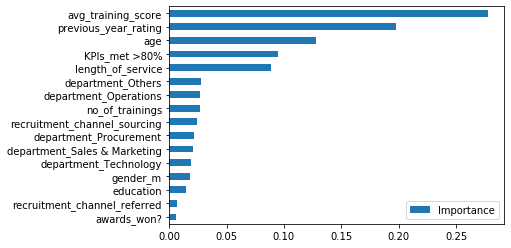

In [164]:
pd.DataFrame(RFC.feature_importances_,index=X_train_sm_std.columns,columns=['Importance']).sort_values(by='Importance',ascending=True).plot(kind='barh')
plt.show()

It is very evedent that average training score plays an very important role in determining the promotion followed by previous year rating.

In [152]:
train_sol=pd.read_csv('test.csv')

In [153]:
solution=pd.DataFrame()
solution['employee_id']=train_sol['employee_id']
solution['is_promoted']=y_pred_rfc
solution.head()

,employee_id,is_promoted
0,8724,0.0
1,74430,0.0
2,72255,0.0
3,38562,0.0
4,64486,0.0


solution['is_promoted']=solution['is_promoted'].astype('int64')

solution.to_csv('RFC.csv',index=False)